# Dry Friction Test Case

## Content

- [Libraries](#Libraries)
- [Sketch container](#Sketch-container)
- [Sketch Parts yaml definition](#Sketch-Parts-yaml-definition)
- [Read yaml sketch definition, draw it](#Read-yaml-sketch-definition,-draw-it)
- [Simulate sketch rotation](#Simulate-sketch-rotation)
- [Sketch composition](#Sketch-composition)
- [Sketch serialization](#Sketch-serialization)

## Libraries

[home](#Content)

In [1]:
%matplotlib widget

import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

In [2]:
import time

In [3]:
from pysketcher import *

In [4]:
from ipywidgets import FloatSlider, AppLayout, Label, HBox, Button, Output

In [5]:
from IPython.display import HTML, SVG, display, clear_output

In [6]:
from math import tan, radians, sin, cos

## Sketch container

[home](#Table-of-Content)

In [7]:
myfig={}
sketch = Sketch(myfig)

## Sketch Parts yaml definition

[home](#Content)

In [ ]:
libraries = """\
name: head
shapes:
    libraries: ["from math import tan, radians, sin, cos","from pysketcher import *"]
"""

In [ ]:
constants = """\
name: constants
shapes:
    fontsize: 18         # size of the characters
    g: 9.81              # constant gravity
    theta: 30.0          # inclined plane angle
    L: 10.0              # sketch sizing parameter
    a: 1.0               #
    xmin: 0.0            # sketech min Abscissa
    ymin: -3.0           # sketech min Ordinate     
    rl: 2.0              # rectangle width
    rL: 1.0              # rectangle length
"""

In [ ]:
frame = """\
name: frame
shapes:
    setframe:            # sketch setup
        action: "drawing_tool.set_coordinate_system(xmin=xmin-L/5, xmax=xmin+1.5*L,ymin=ymin, ymax=ymin+1.5*L,instruction_file='tmp_mpl_friction.py')"
    setblackline:        # default frame values and actions
        action: "drawing_tool.set_linecolor('black')"
    B: point(a+L,0)                      # wall right end
    A: point(a,tan(radians(theta))*L)    # wall left end
    normal_vec: point(sin(radians(theta)),cos(radians(theta)))     # Vector normal to wall
    tangent_vec: point(cos(radians(theta)),-sin(radians(theta)))   # Vector tangent to wall
    help_line: Line(A,B)                 # wall line
    x: a + 3*L/10.                       # contact point Abscissa
    y: help_line(x=x)                    # contact point Ordinate
    contact: point(x, y)                 # contact point: middle of the rectangle bottom edge
    c: contact + rL/2*normal_vec
"""

In [ ]:
body = """\
name: body
shapes:
    rectangle: 
        formula: Rectangle(contact, rl, rL)
        style:
            linecolor: blue
            filled_curves: blue
        transform: ["rotate(-theta, contact)",
                    "translate(-rl/2*tangent_vec)"]
    N: 
        formula: Force(contact - rl*normal_vec, contact, r'$N$', text_pos='start')
        style:
            linecolor: black
    wheel: 
        formula: "Composition({'outer': rectangle})"   
        style:
            shadow: 1
    mc:
        formula: Text(r'$c$', c)
    body: 
        formula: "Composition({'wheel': wheel, 'N': N, 'mc': mc})"
        style:
            linecolor: black
"""

In [ ]:
plan = """\
name: plan
shapes:
    mB:
        formula: Text(r'$B$',B)
    mA:
        formula: Text(r'$A$', A)
    wall: 
        formula: Wall(x=[A[0], B[0]], y=[A[1], B[1]], thickness=-0.25,transparent=False)
        style:
            linecolor: black    
    x_const: 
        formula: Line(contact, contact + point(0,4))
        style:
            linestyle: dotted
        transform: rotate(-theta, contact)
    x_axis: 
        formula: "Axis(start=contact+ 2*rl*normal_vec, length=2*rl,label='$x$', rotation_angle=-theta)"
    plan: 
        formula: "Composition({'body': body, 'inclined wall': wall, 'x start': x_const, 'x axis': x_axis, 'mA': mA, 'mB': mB})"
"""

In [ ]:
friction = """\
name: friction
shapes:
    mg: 
        formula: Gravity(c, rl, text='$Mg$')
        style:
            linecolor: black
    angle: 
        formula: "Arc_wText(r'$<bslash>theta$', center=B, radius=3, start_angle=180-theta, arc_angle=theta, fontsize=fontsize)"
        style:
            linecolor: black
            linewidth: 1
    ground: 
         formula: Line((B[0]-L/10., 0), (B[0]-L/2.,0))
         stlye:
             linecolor: black
             linestyle: dashed
             linewidth: 1
    friction: 
            formula: "Composition({'plan': plan, 'ground': ground, 'mg': mg, 'angle': angle})"
"""

## Read yaml sketch definition, draw it

[home](#Content)

In [ ]:
if sketch.append(libraries):
    if sketch.append(constants):
        if sketch.append(frame):
            if sketch.append(body):
                if sketch.append(plan):
                    if sketch.append(friction):
                        print("success")

In [ ]:
d = myfig['friction'].draw()

In [ ]:
drawing_tool.display()

In [ ]:
def doright(change):
    rotate(-5)
def doleft(change):
    rotate(5)
def rotate(theta):
    angle = myfig['theta']
    angle -= theta
    myfig['theta'] = angle
    drawing_tool.erase()
    x = myfig['plan']['body']['mc'].x
    y = myfig['plan']['body']['mc'].y
    myfig['plan'].rotate(theta,myfig['B'])
    xf = myfig['plan']['body']['mc'].x
    yf = myfig['plan']['body']['mc'].y
    trans = point(xf-x,yf-y)
    myfig['angle'].changeAngle(180-angle, angle)
    myfig['mg'].translate(trans)
    myfig['friction'].draw()

In [ ]:
left = Button(
    description = '',
    icon = 'rotate-left',
)
left.on_click(doleft)
right = Button(
    description = '',
    icon = 'rotate-right',
)
right.on_click(doright)
output = Output()

In [ ]:
applayout = AppLayout(
    center=output,
    footer=HBox([left,right]),
    pane_heights=[0, 6, 1]
)
#drawing_tool.mpl.ion()

In [ ]:
applayout

In [ ]:
with output:
    clear_output()
    display(drawing_tool.mpl.gcf().canvas)

### Turn it interactiv

In [ ]:
drawing_tool.mpl.ion()

Use left and right rotation button to rotate the sketch

## Simulate sketch rotation

[home](#Content)

### Using SVG

In [ ]:
for i in range(0,10):
    doright(None)
    clear_output(wait=True)
    display(SVG(Sketch.matplotlib2SVG()))
    time.sleep(0.01)

### Using PNG

In [ ]:
for i in range(0,10):
    doright(None)
    clear_output(wait=True)
    display(Sketch.matplotlib2PNG()) 
    time.sleep(0.01)

### take a canvas snapshot

In [ ]:
drawing_tool.mpl.gcf().canvas.print_png("friction.png")
from PIL import Image
img = Image.open("friction.png")
img

## Sketch composition

[home](#Content)

In [ ]:
myfig['friction'].graphviz_dot('friction')

In [ ]:
!dot -Tpng -o dotfriction.png friction.dot
from PIL import Image
img = Image.open("dotfriction.png")
img

In [ ]:
!dot -Tsvg -o dotfriction.svg friction.dot

In [ ]:
display(SVG("dotfriction.svg"))

## Sketch serialization

[home](#Content)

### To and from string

In [ ]:
sketchstring = sketch.sketch2String()

In [ ]:
import sys

In [ ]:
sys.stdout.write(sketchstring)

In [ ]:
sketch.string2Sketch(sketchstring)

### To and from File

#### To File

In [ ]:
sketch.sketch2File("dryfriction.yml")

#### From File

In [ ]:
sketch.file2Sketch("dryfriction.yml")

In [11]:
sketch.file2Sketch("springmass.yml")

True

In [12]:
sketch.container['springmass'].draw()

{
'spring': {
    'bar1': {
        'line': "2 (x,y) coords",},
    'spiral': "45 (x,y) coords",
    'bar2': {
        'line': "2 (x,y) coords",},},
'mass': {
    'rectangle': "5 (x,y) coords linewidth=4",},
'left wall': {
    'rectangle': "5 (x,y) coords fillcolor='' fillpattern='/'",},
'ground': {
    'wall': "4 (x,y) coords fillcolor='white' fillpattern='/'",},
'wheel1': {
    'arc': "181 (x,y) coords",},
'wheel2': {
    'arc': "181 (x,y) coords",},
'text_m': "Text at (4,6)",
'text_ku': "Text at (-6,10)",
'x_axis': {
    'arrow': {
        'line': {
            'line': "2 (x,y) coords",},
        'head left': {
            'line': "2 (x,y) coords linestyle='solid'",},
        'head right': {
            'line': "2 (x,y) coords linestyle='solid'",},},
    'label': "Text at (6.96,11.85)",},
'x_axis_start': {
    'line': "2 (x,y) coords linewidth=4",},}

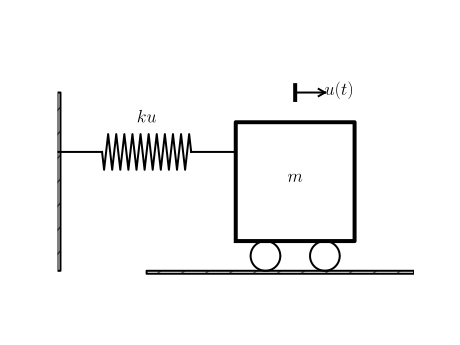

In [13]:
display(SVG(Sketch.matplotlib2SVG()))

### From URL

In [ ]:
sketch.url2Sketch("https://raw.githubusercontent.com/gbrault/jupytersketches/master/dryfriction.yml")

In [ ]:
d = sketch.container['friction'].draw()

In [ ]:
display(SVG(Sketch.matplotlib2SVG()))